In [1]:
import pandas as pd
df_clean = pd.read_csv("../Datasets/Supply_Chain/DataCoSupplyChainDataset_clean.csv")

In [2]:
df_time = pd.DataFrame()

In [3]:
df_clean["shipping_date"] = pd.to_datetime(df_clean["shipping_date"])
df_clean["order_date"] = pd.to_datetime(df_clean["order_date"]) 

In [4]:
df_time['Year_Month'] = df_clean['order_date'].dt.strftime('%Y-%m')
df_time['Year_Month_Date'] = df_clean['order_date'].dt.strftime('%Y-%m-%d')

In [5]:
df_time

,Year_Month,Year_Month_Date
0,2018-01,2018-01-31
1,2018-01,2018-01-13
2,2018-01,2018-01-13
3,2018-01,2018-01-13
4,2018-01,2018-01-13
...,...,...
180514,2016-01,2016-01-16
180515,2016-01,2016-01-16
180516,2016-01,2016-01-15
180517,2016-01,2016-01-15


In [6]:
df_time['Order_Id'] = df_clean['Order_Id']

In [7]:
df_time

,Year_Month,Year_Month_Date,Order_Id
0,2018-01,2018-01-31,77202
1,2018-01,2018-01-13,75939
2,2018-01,2018-01-13,75938
3,2018-01,2018-01-13,75937
4,2018-01,2018-01-13,75936
...,...,...,...
180514,2016-01,2016-01-16,26043
180515,2016-01,2016-01-16,26037
180516,2016-01,2016-01-15,26024
180517,2016-01,2016-01-15,26022


In [8]:
df_time_series_year_month = df_time.groupby(['Year_Month'])['Order_Id'].count().reset_index(name="Number_of_Orders")

In [9]:
df_time_series_year_month.set_index('Year_Month', inplace=True)
df_time_series_year_month.head()

,Number_of_Orders
Year_Month,
2015-01,5322
2015-02,4729
2015-03,5362
2015-04,5126
2015-05,5357


In [10]:
# SMA over a period of 10 and 20 years 
df_time_series_year_month['SMA_10'] = df_time_series_year_month.Number_of_Orders.rolling(10, min_periods=1).mean()
df_time_series_year_month['SMA_20'] = df_time_series_year_month.Number_of_Orders.rolling(20, min_periods=1).mean()

In [11]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Number_of_Orders')

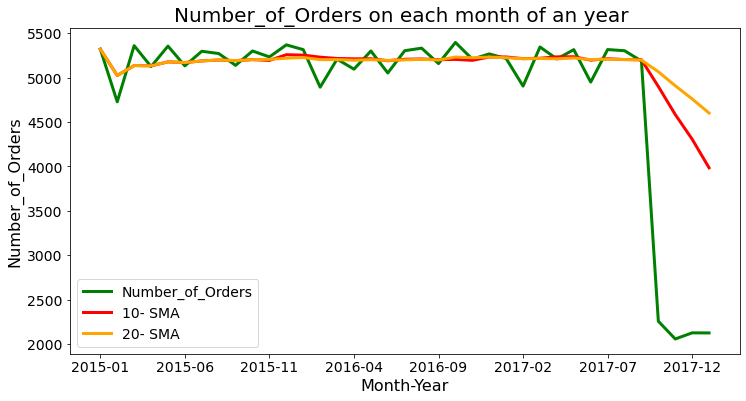

In [12]:
colors = ['green', 'red', 'orange']
df_time_series_year_month.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Number_of_Orders', '10- SMA', '20- SMA'], fontsize=14)
plt.title('Number_of_Orders on each month of an year ', fontsize=20)
plt.xlabel('Month-Year', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

In [13]:
df_time_series_year_month['CMA'] = df_time_series_year_month.Number_of_Orders.expanding().mean()


Text(0, 0.5, 'Number_of_Orders')

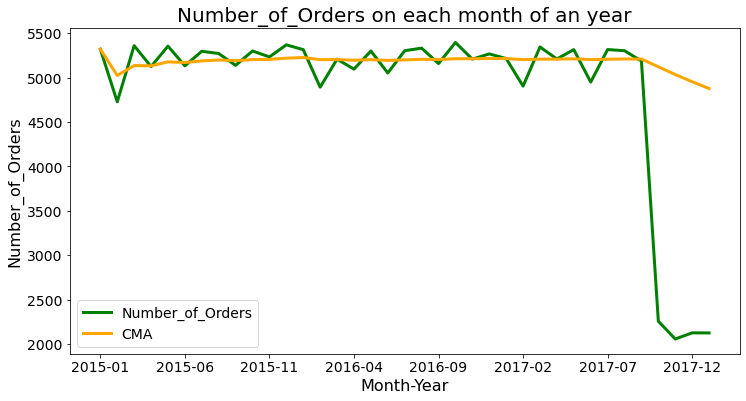

In [14]:
colors = ['green', 'orange']
df_time_series_year_month[['Number_of_Orders', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Number_of_Orders', 'CMA'], fontsize=14)
plt.title('Number_of_Orders on each month of an year', fontsize=20)
plt.xlabel('Month-Year', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

In [15]:
# Let's smoothing factor - 0.1
df_time_series_year_month['EMA_0.1'] = df_time_series_year_month.Number_of_Orders.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df_time_series_year_month['EMA_0.3'] = df_time_series_year_month.Number_of_Orders.ewm(alpha=0.3, adjust=False).mean()

Text(0, 0.5, 'Number_of_Orders')

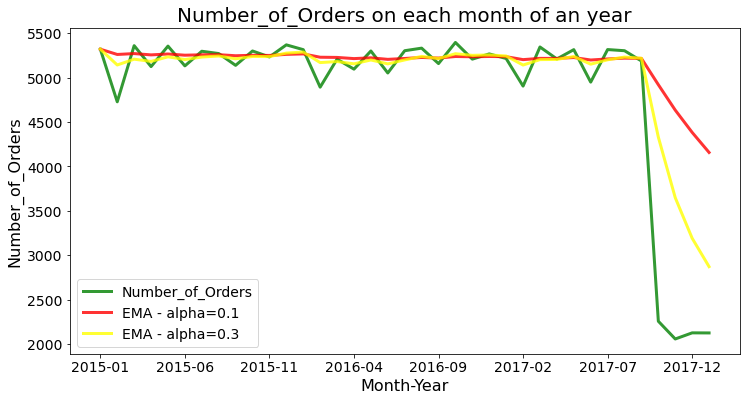

In [16]:
# green - Number of Orders, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
df_time_series_year_month[['Number_of_Orders', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Number_of_Orders', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('Number_of_Orders on each month of an year', fontsize=20)
plt.xlabel('Month-Year', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

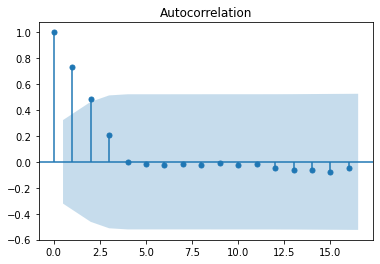

In [18]:
plot_acf(df_time_series_year_month[['Number_of_Orders']])
plt.show()

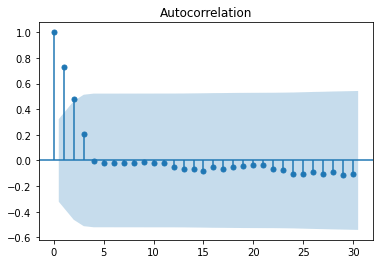

In [19]:
plot_acf(df_time_series_year_month[['Number_of_Orders']], lags=30)
plt.show()

In [20]:
df_time_series_year_month_date = df_time.groupby(['Year_Month_Date'])['Order_Id'].count().reset_index(name="Number_of_Orders")
df_time_series_year_month_date

,Year_Month_Date,Number_of_Orders
0,2015-01-01,168
1,2015-01-02,154
2,2015-01-03,179
3,2015-01-04,191
4,2015-01-05,160
...,...,...
1122,2018-01-27,68
1123,2018-01-28,69
1124,2018-01-29,68
1125,2018-01-30,69


In [21]:
df_time_series_year_month_date.set_index('Year_Month_Date', inplace=True)
df_time_series_year_month_date.head()

,Number_of_Orders
Year_Month_Date,
2015-01-01,168
2015-01-02,154
2015-01-03,179
2015-01-04,191
2015-01-05,160


In [22]:
# SMA over a period of 10 and 20 years 
df_time_series_year_month_date['SMA_10'] = df_time_series_year_month_date.Number_of_Orders.rolling(10, min_periods=1).mean()
df_time_series_year_month_date['SMA_20'] = df_time_series_year_month_date.Number_of_Orders.rolling(20, min_periods=1).mean()

Text(0, 0.5, 'Number_of_Orders')

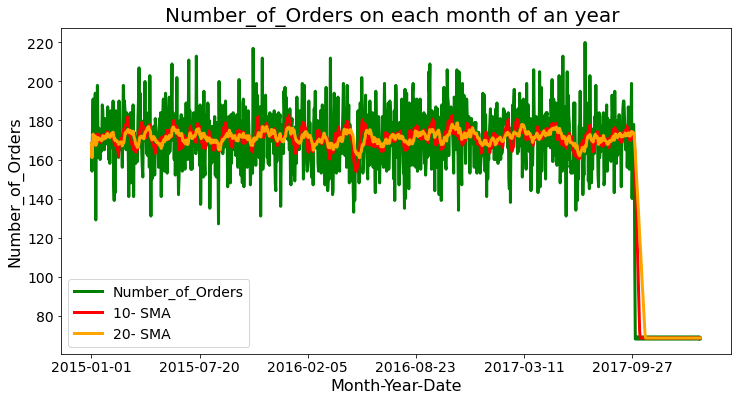

In [23]:
colors = ['green', 'red', 'orange']
df_time_series_year_month_date.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Number_of_Orders', '10- SMA', '20- SMA'], fontsize=14)
plt.title('Number_of_Orders on each month of an year ', fontsize=20)
plt.xlabel('Month-Year-Date', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

In [24]:
df_time_series_year_month_date['CMA'] = df_time_series_year_month_date.Number_of_Orders.expanding().mean()

Text(0, 0.5, 'Number_of_Orders')

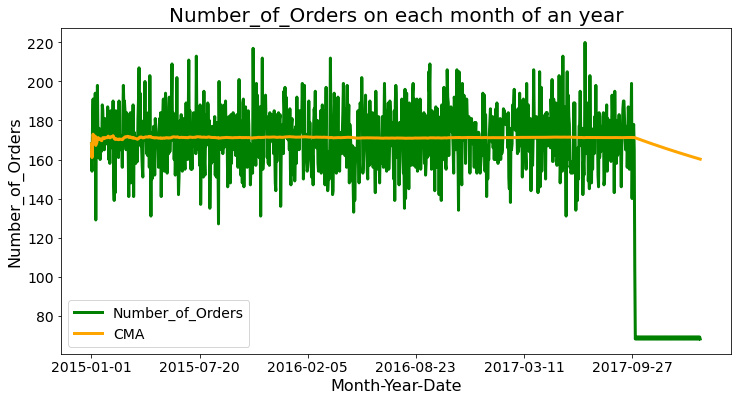

In [25]:
colors = ['green', 'orange']
df_time_series_year_month_date[['Number_of_Orders', 'CMA']].plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['Number_of_Orders', 'CMA'], fontsize=14)
plt.title('Number_of_Orders on each month of an year', fontsize=20)
plt.xlabel('Month-Year-Date', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

In [26]:
# Let's smoothing factor - 0.1
df_time_series_year_month_date['EMA_0.1'] = df_time_series_year_month_date.Number_of_Orders.ewm(alpha=0.1, adjust=False).mean()
# Let's smoothing factor  - 0.3
df_time_series_year_month_date['EMA_0.3'] = df_time_series_year_month_date.Number_of_Orders.ewm(alpha=0.3, adjust=False).mean()

Text(0, 0.5, 'Number_of_Orders')

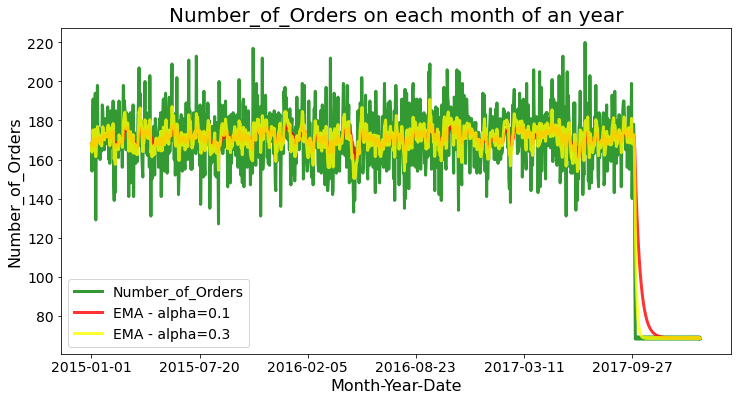

In [27]:
# green - Number of Orders, red- smoothing factor - 0.1, yellow - smoothing factor  - 0.3
colors = ['green', 'red', 'yellow']
df_time_series_year_month_date[['Number_of_Orders', 'EMA_0.1', 'EMA_0.3']].plot(color=colors, linewidth=3, figsize=(12,6), alpha=0.8)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels=['Number_of_Orders', 'EMA - alpha=0.1', 'EMA - alpha=0.3'], fontsize=14)
plt.title('Number_of_Orders on each month of an year', fontsize=20)
plt.xlabel('Month-Year-Date', fontsize=16)
plt.ylabel('Number_of_Orders', fontsize=16)

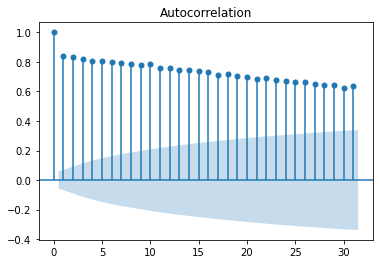

In [28]:
plot_acf(df_time_series_year_month_date[['Number_of_Orders']])
plt.show()

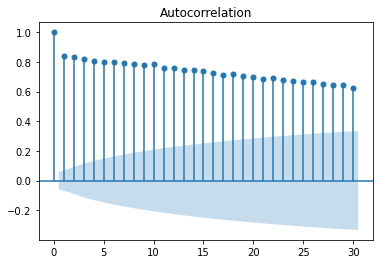

In [29]:
plot_acf(df_time_series_year_month_date[['Number_of_Orders']], lags=30)
plt.show()